<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/EnsembleLearning_Voting_and_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

    for a diverse set of models in comparison to single models. 
    This diversification in Machine Learning is achieved by a technique called Ensemble Learning.

Basic Ensemble Learning Technique :

  1. Voting Classifier
  2. Stacking Classifier / Regressor

In [36]:
#Import Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier,StackingClassifier,StackingRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Voting Classifier

    The max voting method is generally used for classification problems. In this technique, 
    multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. 
    The predictions which we get from the majority of the models are used as the final prediction.

    

In [5]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
x=df.drop(columns=["Outcome"])
y=df["Outcome"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
lr=LogisticRegression(class_weight='balanced')
knn=KNeighborsClassifier(n_neighbors=3)
svc=SVC(probability =True)
nb=GaussianNB()
dt=DecisionTreeClassifier()
models=[('lr',lr),('knn',knn),('svm',svc),('GNB',nb),('dt',dt)]

In [13]:
from sklearn.ensemble import VotingClassifier
model=VotingClassifier(estimators=models,voting='soft')
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy is : 0.7857142857142857
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       107
           1       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154



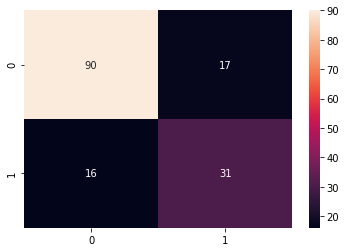

In [14]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [15]:
#probability is calculated only if voting is 'soft'
# predict class probabilities for all classifiers
probas = [c.fit(x, y).predict_proba(x) for c in (lr, knn, svc, nb, dt, model)]
# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<Figure size 720x576 with 0 Axes>

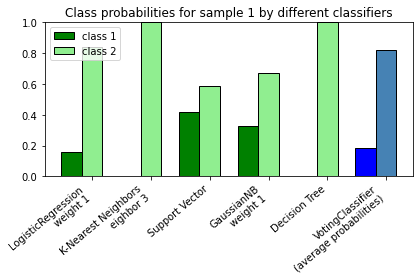

In [28]:

N = 6  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0,0,0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0,0,0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'K-Nearest Neighbors\neighbor 3',
                    'Support Vector',
                    'GaussianNB\nweight 1',
                    'Decision Tree',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()


##Stacking Classifier

Stacking is an ensemble learning technique that uses predictions from multiple models (for example decision tree, knn or svm) to build a new model. This model is used for making predictions on the test set.

    1.The train set is split into 10 parts.
    2.A base model (suppose a decision tree) is fitted on 9 parts and predictions are made for the 10th part. 
      This is done for each part of the train set.
    3.The base model (in this case, decision tree) is then fitted on the whole train dataset.
    4.Using this model, predictions are made on the test set.
    5.Steps 2 to 4 are repeated for another base model (say knn)
      resulting in another set of predictions for the train set and test set.
    6.The predictions from the train set are used as features to build a new model.
    7.This model is used to make final predictions on the test prediction set.

In [29]:
lr=LogisticRegression(class_weight='balanced')
knn=KNeighborsClassifier(n_neighbors=3)
svc=SVC(probability =True)
nb=GaussianNB()
dt=DecisionTreeClassifier()
models=[('lr',lr),('knn',knn),('svm',svc),('GNB',nb),('dt',dt)]

final_model=LogisticRegression()


In [ ]:
model=StackingClassifier(estimators=models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

Accuracy is : 0.8051948051948052
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



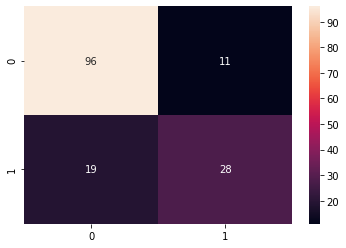

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [ ]:
#probability is calculated only if voting is 'soft'
# predict class probabilities for all classifiers
probas = [c.fit(x, y).predict_proba(x) for c in (lr, knn, svc, nb, dt, model)]
# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


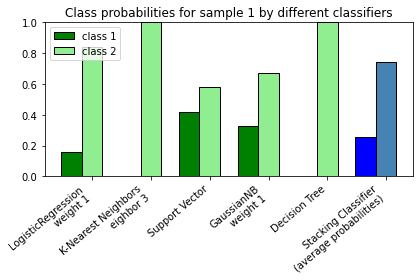

In [35]:

N = 6  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0,0,0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0,0,0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'K-Nearest Neighbors\neighbor 3',
                    'Support Vector',
                    'GaussianNB\nweight 1',
                    'Decision Tree',
                    'Stacking Classifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.tight_layout()
plt.show()


#Stacking Regressor


In [40]:
df = pd.read_csv('/content/housing.csv')
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [41]:
x = df.drop(columns='MEDV')
y = df['MEDV']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [42]:
base_models=[("Elasticnet",ElasticNetCV()),('gbr',GradientBoostingRegressor(n_estimators=100)),('svr',SVR())]
final_model=LinearRegression()

In [43]:
model=StackingRegressor(estimators=base_models,final_estimator=final_model)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [44]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

0.8372638728999231


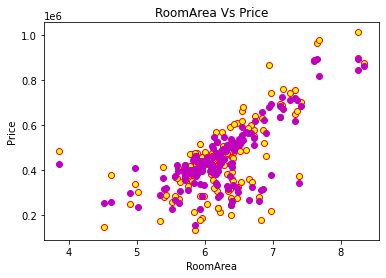

In [56]:
plt.scatter(xtest['RM'],ytest,color='yellow', edgecolors='red')
plt.scatter(xtest['RM'],model.predict(xtest),color='m')
plt.title("RoomArea Vs Price")
plt.xlabel("RoomArea")
plt.ylabel("Price")
plt.show()

